# CNN
CNN stands for Convolutional Neural Network. It's a type of deep learning model that's especially powerful for image processing and computer vision tasks, but it's also used in other domains like video analysis, natural language processing, and more.

---
# 🧠 What Makes CNNs Special?

CNNs are designed to automatically and adaptively learn **spatial hierarchies of features** from input data. That means they can detect edges, shapes, and patterns in an image by learning filters, all **without manual feature engineering**.

---

## 🧩 Key Components of a CNN:

### 1. **Convolutional Layer**
- Applies filters (kernels) to input data.
- Helps in detecting low-level features like edges, corners, textures.
- Output is called a **feature map**.

### 2. **ReLU Activation (Rectified Linear Unit)**
- Adds non-linearity to the model so it can learn complex patterns.
- Formula: `f(x) = max(0, x)`

### 3. **Pooling Layer** *(usually Max Pooling)*
- Reduces the spatial size of the feature maps.
- Makes the computation more efficient and reduces overfitting.

### 4. **Fully Connected (Dense) Layer**
- Neurons have full connections to all activations in the previous layer.
- Typically used at the end for classification or regression.

### 5. **Output Layer**
- Depends on the task:
  - `Softmax` for classification
  - `Linear` for regression

---

## 🖼 Example: Image Classification

If you feed a CNN an image of a **cat**, it might:

- **Layer 1**: Detect edges.  
- **Layer 2**: Detect shapes (like ears, whiskers).  
- **Layer 3**: Combine features to detect the whole cat.  
- **Final Layer**: Output class `"cat"` with a probability score.


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Input, Rescaling, MaxPooling2D, Flatten, Dropout
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
dir_path = "../Datasets/Lung X-Ray Image"

for dir in os.listdir(dir_path):
  print(dir_path + "/" + dir)

../Datasets/Lung X-Ray Image/Normal
../Datasets/Lung X-Ray Image/Viral Pneumonia


In [3]:
os.listdir(dir_path)

['Normal', 'Viral Pneumonia']

# ✅ 1. Dataset Loading for Binary Classification (Grayscale)
You’re working with grayscale images, so you will load the data as grayscale (1 channel). Since it’s binary classification, ensure you have two folders (Normal and Viral Pneumonia) for the respective classes.

In [4]:
# Training dataset (80%)
train_ds = image_dataset_from_directory(
    dir_path,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(256, 256),
    batch_size=32,
    color_mode='grayscale',  # Load as grayscale images
    label_mode='int'
)

# Validation dataset (20%)
val_ds = image_dataset_from_directory(
    dir_path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(256, 256),
    batch_size=32,
    color_mode='grayscale',  # Load as grayscale images
    label_mode='int'
)


Found 2350 files belonging to 2 classes.
Using 1880 files for training.
Found 2350 files belonging to 2 classes.
Using 470 files for validation.


In [5]:
for images, labels in train_ds.take(1):
    print(images.shape)  # (32, 224, 224, 3)
    print(labels.shape)  # (32,)


(32, 256, 256, 1)
(32,)


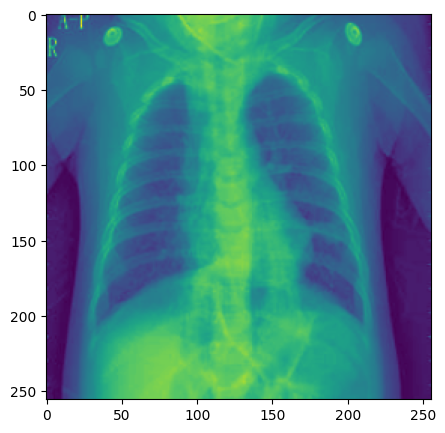

In [6]:
# Load one batch from the dataset
for images, labels in train_ds.take(1):
    plt.figure(figsize=(5, 5))
    plt.imshow(images[0].numpy().astype("uint8"))  # Convert tensor to image
    plt.show()

# ✅ 2. Adjust the Model for Binary Classification
For binary classification, you need:
- 1 output unit (since it’s either class 0 or class 1).
- Sigmoid activation for the output layer (instead of softmax, which is used for multi-class).
- Binary crossentropy loss for binary classification.

---
## 🧠 Summary: Rules of Thumb

| Feature            | Best Practice                                          |
|--------------------|--------------------------------------------------------|
| **Filter Size**     | 3×3 almost always                                      |
| **# of Filters**    | Increase with depth (32 → 64 → 128...)                |
| **Conv Layers**     | 3 to 5 for small/medium datasets                      |
| **Padding**         | Use `same` to preserve spatial size                   |
| **Pooling**         | After every 1–2 Conv layers                          |
| **Dropout**         | Add 0.5 before Dense layer to reduce overfitting      |
| **Dense Layer**     | 1–2 layers, final layer = 1 neuron for binary with `sigmoid` |


In [7]:
model = Sequential([
    Input(shape=(256, 256, 1)),  # Grayscale images (1 channel)
    Rescaling(1./255),  # Normalize images to [0, 1]
    
    # Convolutional layers
    Conv2D(32, 3, activation='relu', padding='same'),
    MaxPooling2D(),
    
    Conv2D(64, 3, activation='relu', padding='same'),
    MaxPooling2D(),
    
    Conv2D(128, 3, activation='relu', padding='same'),
    MaxPooling2D(),
    
    # Flatten and fully connected layers
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    
    # Output layer for binary classification
    Dense(1, activation='sigmoid')  # 1 unit with sigmoid activation for binary classification
])

# Adam and Gradient Descent (GD)

**Adam** (short for Adaptive Moment Estimation) is actually a more advanced variant of **Gradient Descent**. When you use Adam, you are still fundamentally using Gradient Descent, but Adam comes with some enhancements to make the optimization process more efficient and stable.

## How Adam Works
Adam uses two important concepts from Gradient Descent:

1. **Momentum**: 
   - This helps the optimizer move faster in the right direction by keeping track of the previous gradients. 
   - This is like remembering the path it’s been on and pushing the updates more efficiently.

2. **Adaptive Learning Rate**: 
   - Unlike traditional Gradient Descent, where a single learning rate is used for all parameters, Adam adapts the learning rate for each parameter individually. 
   - It does this by keeping track of the **first moment** (the mean) and the **second moment** (the uncentered variance) of the gradients.


In [8]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Binary crossentropy loss for binary classification
    metrics=['accuracy']
)

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 256, 256, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      16,777,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,610,437 (193.06 MB)

 Trainable params: 16,870,145 (64.35 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 33,740,292 (128.71 MB)

# ✅ 3.Train the Model
To train the model, you can use the .fit() method to fit the model on the dataset.

In [9]:
# Train the model using the dataset
history = model.fit(
    train_ds,                # The training dataset
    validation_data=val_ds,  # The validation dataset
    epochs=10,               # Number of training epochs
    batch_size=32            # Batch size (this should match what you used for the dataset)
)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 189s 3s/step - accuracy: 0.6398 - loss: 0.8142 - val_accuracy: 0.9106 - val_loss: 0.2215
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 177s 3s/step - accuracy: 0.9252 - loss: 0.1988 - val_accuracy: 0.9213 - val_loss: 0.1580
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 207s 3s/step - accuracy: 0.9387 - loss: 0.1697 - val_accuracy: 0.9511 - val_loss: 0.1363
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 200s 3s/step - accuracy: 0.9441 - loss: 0.1515 - val_accuracy: 0.9383 - val_loss: 0.1232
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 160s 3s/step - accuracy: 0.9614 - loss: 0.1058 - val_accuracy: 0.9596 - val_loss: 0.0928
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 160s 3s/step - accuracy: 0.9754 - loss: 0.0751 - val_accuracy: 0.9426 - val_loss: 0.1118
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 159s 3s/step - accuracy: 0.9706 - loss: 0.0808 - val_accuracy: 0.9617 - val_loss: 0.0885
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 164s 3s/step - accuracy: 0.9763 - loss: 0.0651 - val_accuracy: 0.9617 - v

# ✅ 4.Monitor Training Performance
The history object will contain information about the training and validation loss/accuracy at each epoch. You can visualize this with matplotlib to track the model's performance during training:

In [10]:
evaluation_metrics_df = pd.DataFrame(history.history)
evaluation_metrics_df

,accuracy,loss,val_accuracy,val_loss
0,0.777128,0.510891,0.910638,0.221547
1,0.922872,0.202728,0.921277,0.157962
2,0.943617,0.159131,0.951064,0.136307
3,0.950532,0.138369,0.938298,0.123156
4,0.963298,0.099315,0.959574,0.092814
5,0.970213,0.080427,0.942553,0.111799
6,0.969681,0.078837,0.961702,0.088470
7,0.975000,0.066151,0.961702,0.079661
8,0.980851,0.051025,0.957447,0.088489
9,0.987766,0.035024,0.963830,0.083990


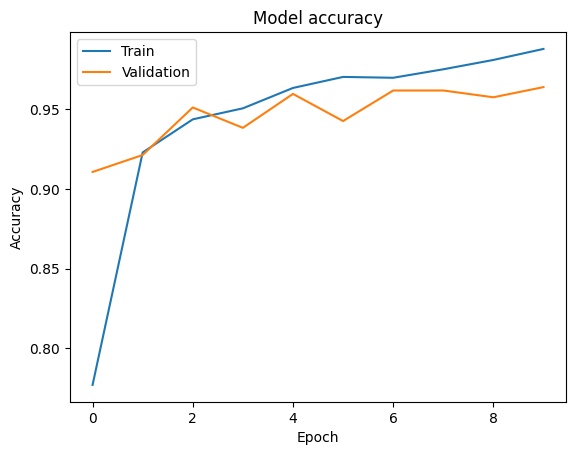

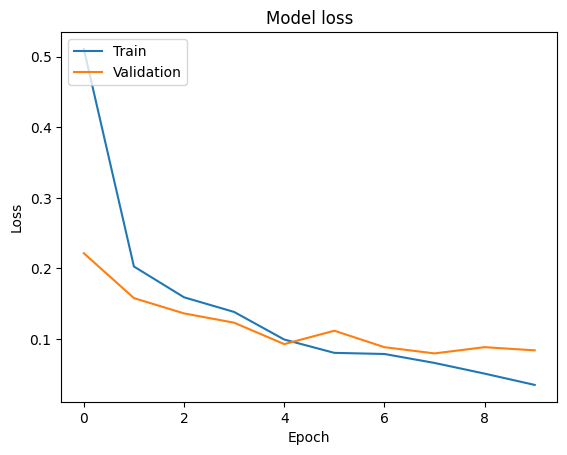

In [11]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
